<a href="https://colab.research.google.com/github/fishitmo/Takeobds/blob/main/Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predictive Maintenance Project Work**

**Problem Description**

One of the primary challenges encountered by companies operating in asset-intensive sectors like manufacturing is the substantial expenses linked to production delays resulting from mechanical issues. Many of these enterprises aim to forecast these problems beforehand to take preventive measures, thereby minimizing the costly repercussions of downtime.

**About Dataset**

**Context**

This an example data source which can be used for Predictive Maintenance Model Building. It consists of the following data:

* Machine conditions and usage: The operating conditions
  of a machine e.g. data collected from sensors.
* Failure history: The failure history of a machine or
  component within the machine.

* Maintenance history: The repair history of a machine,  
  e.g. error codes, previous maintenance activities or
  component replacements.
* Machine features: The features of a machine, e.g.  
  engine size, make and model, location.

**Details**

* **Telemetry Time Series Data (PdM_telemetry.csv):** It consists of hourly average of voltage, rotation, pressure, vibration collected from 100 machines for the year 2015.

* **Error (PdM_errors.csv):** These are errors encountered by the machines while in operating condition. Since, these errors don't shut down the machines, these are not considered as failures. The error date and times are rounded to the closest hour since the telemetry data is collected at an hourly rate.

* **Maintenance (PdM_maint.csv):** If a component of a machine is replaced, that is captured as a record in this table. Components are replaced under two situations: 1. During the regular scheduled visit, the technician replaced it (Proactive Maintenance) 2. A component breaks down and then the technician does an unscheduled maintenance to replace the component (Reactive Maintenance). This is considered as a failure and corresponding data is captured under Failures. Maintenance data has both 2014 and 2015 records. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.

* **Failures (PdM_failures.csv):** Each record represents replacement of a component due to failure. This data is a subset of Maintenance data. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.

* **Metadata of Machines (PdM_Machines.csv):** Model type & age of the Machines.

To solve the predictive maintenance problem using the provided dataset, you can follow these general steps:

1. **Data Understanding**:
   - Begin by understanding the dataset's structure, the meaning of each column, and the relationships between the tables (if any).
   - Explore the metadata of machines to understand their types and ages.
   - Examine the Telemetry Time Series Data, Error Data, Maintenance Data, and Failure Data to get a sense of the available information.

2. **Data Preprocessing**:
   - Handle missing data: Check for missing values in the dataset and decide how to handle them (e.g., impute or remove rows/columns).
   - Data cleaning: Check for any erroneous or inconsistent data and clean it if necessary.
   - Data transformation: Convert timestamps into a consistent format, if needed. Perform feature engineering to create relevant features for predictive maintenance.

3. **Exploratory Data Analysis (EDA)**:
   - Visualize the data to identify patterns and insights.
   - Examine the distribution of machine conditions, usage, errors, and failures over time.
   - Check for correlations between different features.
   - Analyze the distribution of maintenance activities (proactive and reactive) and failures.

4. **Feature Selection**:
   - Identify relevant features for predictive maintenance. This may include telemetry data, error information, maintenance history, and machine features.
   - Consider techniques like feature importance and correlation analysis to choose the most informative features.

5. **Data Preparation**:
   - Split the dataset into training and testing sets to evaluate model performance.
   - Normalize or scale features if necessary.
   - Handle categorical variables, if any, using techniques like one-hot encoding or label encoding.

6. **Model Selection**:
   - Choose appropriate machine learning or predictive modeling algorithms for your task. Common choices include logistic regression, decision trees, random forests, gradient boosting, or deep learning models like neural networks.
   - Depending on the specific problem within predictive maintenance (e.g., predicting failures or maintenance needs), select the appropriate target variable and model accordingly.

7. **Model Training**:
   - Train the selected model(s) using the training dataset.
   - Tune hyperparameters through techniques like grid search or random search to optimize model performance.
   - Evaluate models using appropriate metrics such as accuracy, precision, recall, F1-score, or AUC-ROC, depending on the problem.

8. **Model Evaluation**:
   - Evaluate the trained models on the testing dataset to assess their performance.
   - Consider using additional techniques like cross-validation for robust evaluation.

9. **Model Interpretation**:
   - Interpret the results and model predictions to understand the factors contributing to maintenance needs or failures.

10. **Deployment**:
    - If the model performs well, consider deploying it in a real-world predictive maintenance system.
    - Ensure the model is integrated into the existing maintenance process and regularly updated with new data.

11. **Monitoring and Maintenance**:
    - Continuously monitor the model's performance in production and update it as needed.
    - Monitor machine conditions and usage to trigger maintenance actions based on model predictions.

12. **Documentation**:
    - Document the entire process, including data preprocessing, feature engineering, model selection, training, and deployment for future reference and collaboration.

Remember that predictive maintenance is an ongoing process that may require iteration and refinement as more data becomes available or as the model's performance is assessed in a real-world environment.

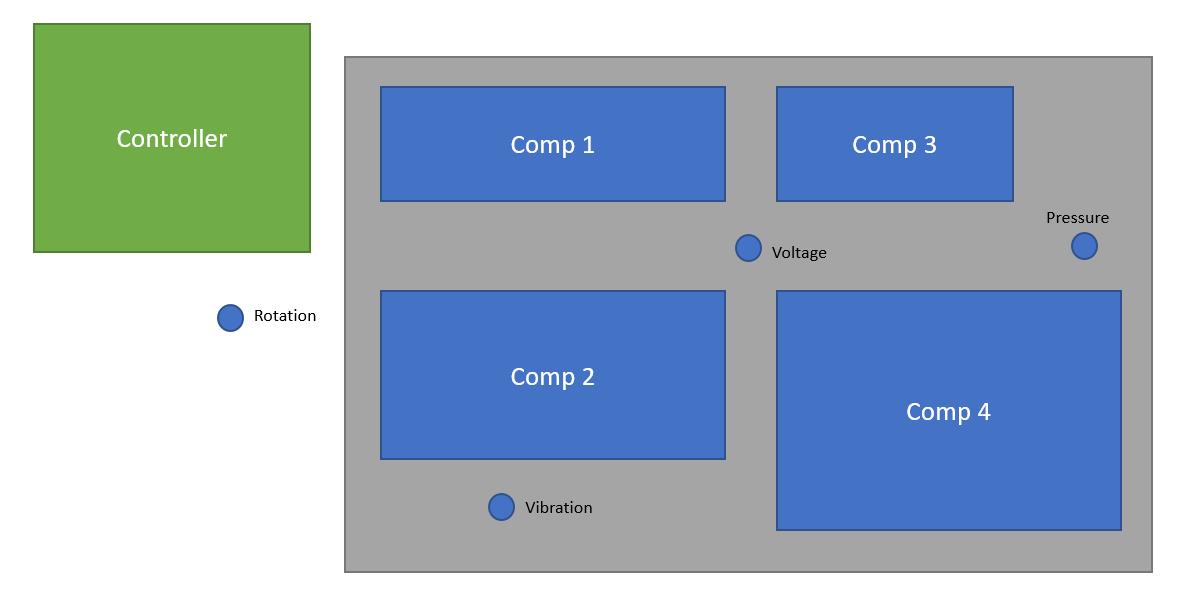

#**Data Sources**

Typical data origins for predictive maintenance issues encompass:

1. Failure history: Record of machine or component failures over time.
2. Maintenance history: Log of machine repairs, including error codes, prior maintenance actions, or component replacements.
3. Machine conditions and usage: Operating parameters of the machine, often obtained from sensor data.
4. Machine features: Characteristics of the machine, such as engine specifications, make and model, and location.

In this instance, the data is sourced from four distinct outlets: real-time telemetry from machines, error messages, historical maintenance logs detailing failures, and machine specifications like type and age.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import * # module math
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
import itertools
import io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving PdM_telemetry.csv to PdM_telemetry.csv


In [3]:
filename = next(iter(uploaded))

In [4]:
telemetry = pd.read_csv(filename)

#**Telemetry**

The initial data origin comprises telemetry time-series data, comprising voltage, rotation, pressure, and vibration readings gathered from 100 machines in real-time. These measurements are averaged over hourly intervals throughout the year 2015. Presented below are the initial ten entries from the dataset, along with an overview of the entire dataset.

In [8]:
# format datetime field which comes in as string
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))
print(telemetry.head())
telemetry.describe()

Total number of telemetry records: 876100
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  


,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


As an example, below is a plot of voltage values and pressure values for machine ID 1 and 2 for the first 2 months of 2015

Text(0.5, 0, 'Date')

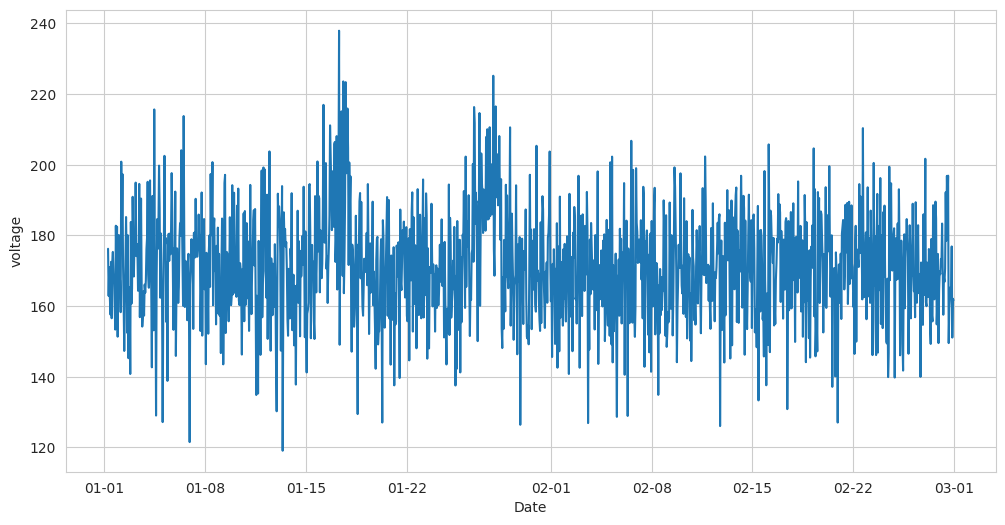

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-03-01')), ['datetime', 'volt']]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

Text(0.5, 0, 'Date')

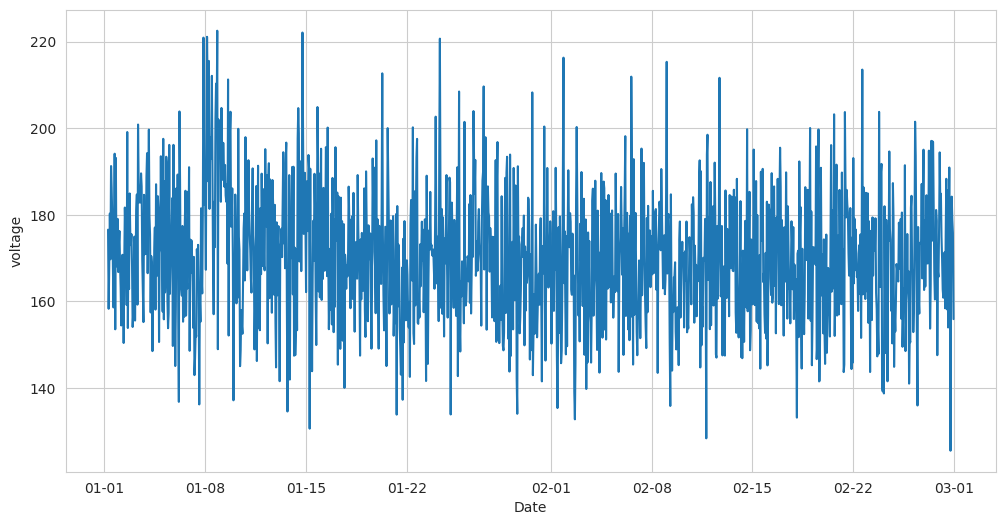

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 2) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-03-01')), ['datetime', 'volt']]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

Text(0.5, 0, 'Date')

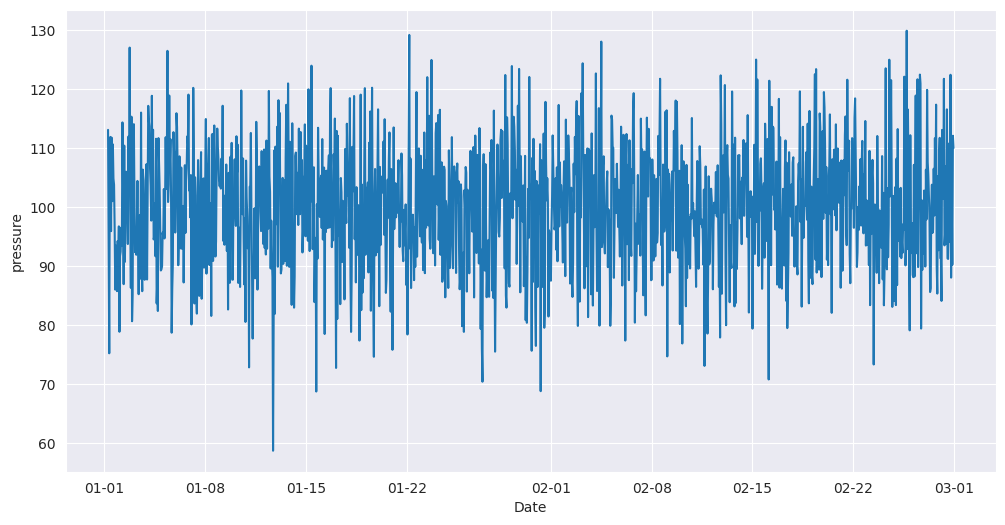

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-03-01')), ['datetime', 'pressure']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['pressure'])
plt.ylabel('pressure')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

Text(0.5, 0, 'Date')

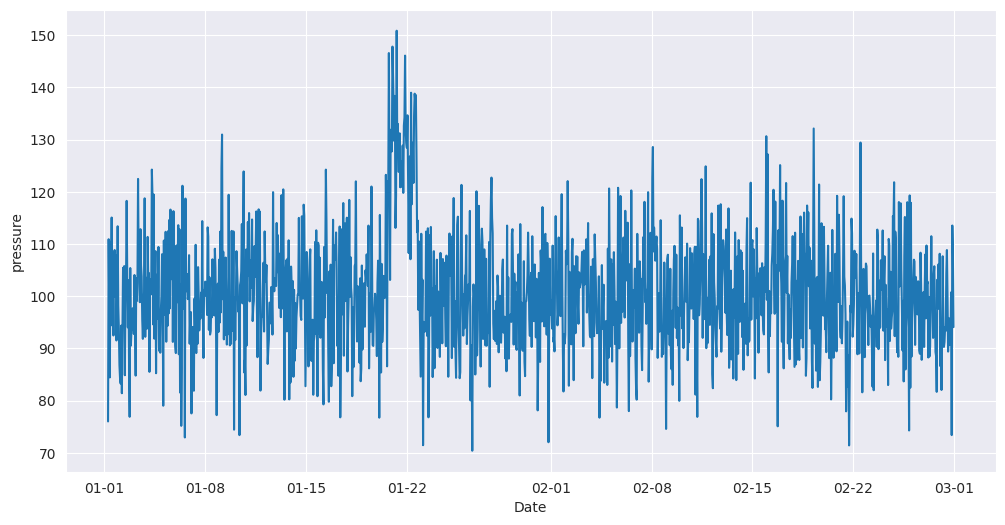

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 2) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-03-01')), ['datetime', 'pressure']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['pressure'])
plt.ylabel('pressure')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PdM_failures.csv to PdM_failures.csv


In [ ]:
filename = next(iter(uploaded))

In [ ]:
failures = pd.read_csv(filename)

In [ ]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


#**Errors**
The second significant data origin pertains to error logs. These logs document non-disruptive errors that occur while the machine remains in operation and do not qualify as failures. The timestamps for these errors are rounded to the nearest hour to align with the hourly telemetry data collection rate.

In [16]:
from google.colab import files
uploaded = files.upload()

Saving PdM_errors.csv to PdM_errors.csv


In [17]:
filename = next(iter(uploaded))

In [18]:
errors = pd.read_csv(filename)

In [19]:
# format datetime field which comes in as string
errors['datetime'] = pd.to_datetime(errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('category')

print("Total number of error records: %d" % len(errors.index))
errors.head()

Total number of error records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [22]:
errors.columns

Index(['datetime', 'machineID', 'errorID'], dtype='object')

<ipython-input-32-7d8eb40945f1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=errors['errorID'].value_counts().index,


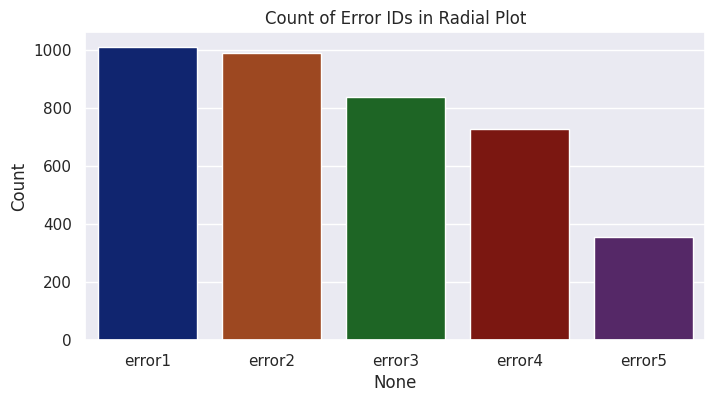

In [32]:
# Assuming 'errors' DataFrame contains the error data
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))

# Create a radial bar plot of the count of error IDs
sns.barplot(x=errors['errorID'].value_counts().index,
            y=errors['errorID'].value_counts().values,
            palette="dark")

plt.ylabel('Count')
plt.title('Count of Error IDs in Radial Plot')
plt.show()


#**Maintenance**

These records encompass both planned and unplanned maintenance activities, covering routine component inspections as well as instances of component replacement prompted by failures. A record is logged when a component is swapped out during a scheduled inspection or due to a breakdown. Those records resulting from breakdowns are termed as failures, as elaborated in subsequent sections. The maintenance data includes records from both 2014 and 2015.

In [33]:
from google.colab import files
uploaded = files.upload()

Saving PdM_maint.csv to PdM_maint.csv


In [34]:
filename = next(iter(uploaded))

In [35]:
maint = pd.read_csv(filename)

In [36]:
# format datetime field which comes in as string
maint['datetime'] = pd.to_datetime(maint['datetime'], format="%Y-%m-%d %H:%M:%S")
maint['comp'] = maint['comp'].astype('category')

print("Total number of maintenance records: %d" % len(maint.index))
maint.head()

Total number of maintenance records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PdM_machines.csv to PdM_machines.csv


In [ ]:
filename = next(iter(uploaded))

In [ ]:
machines = pd.read_csv(filename)

In [ ]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


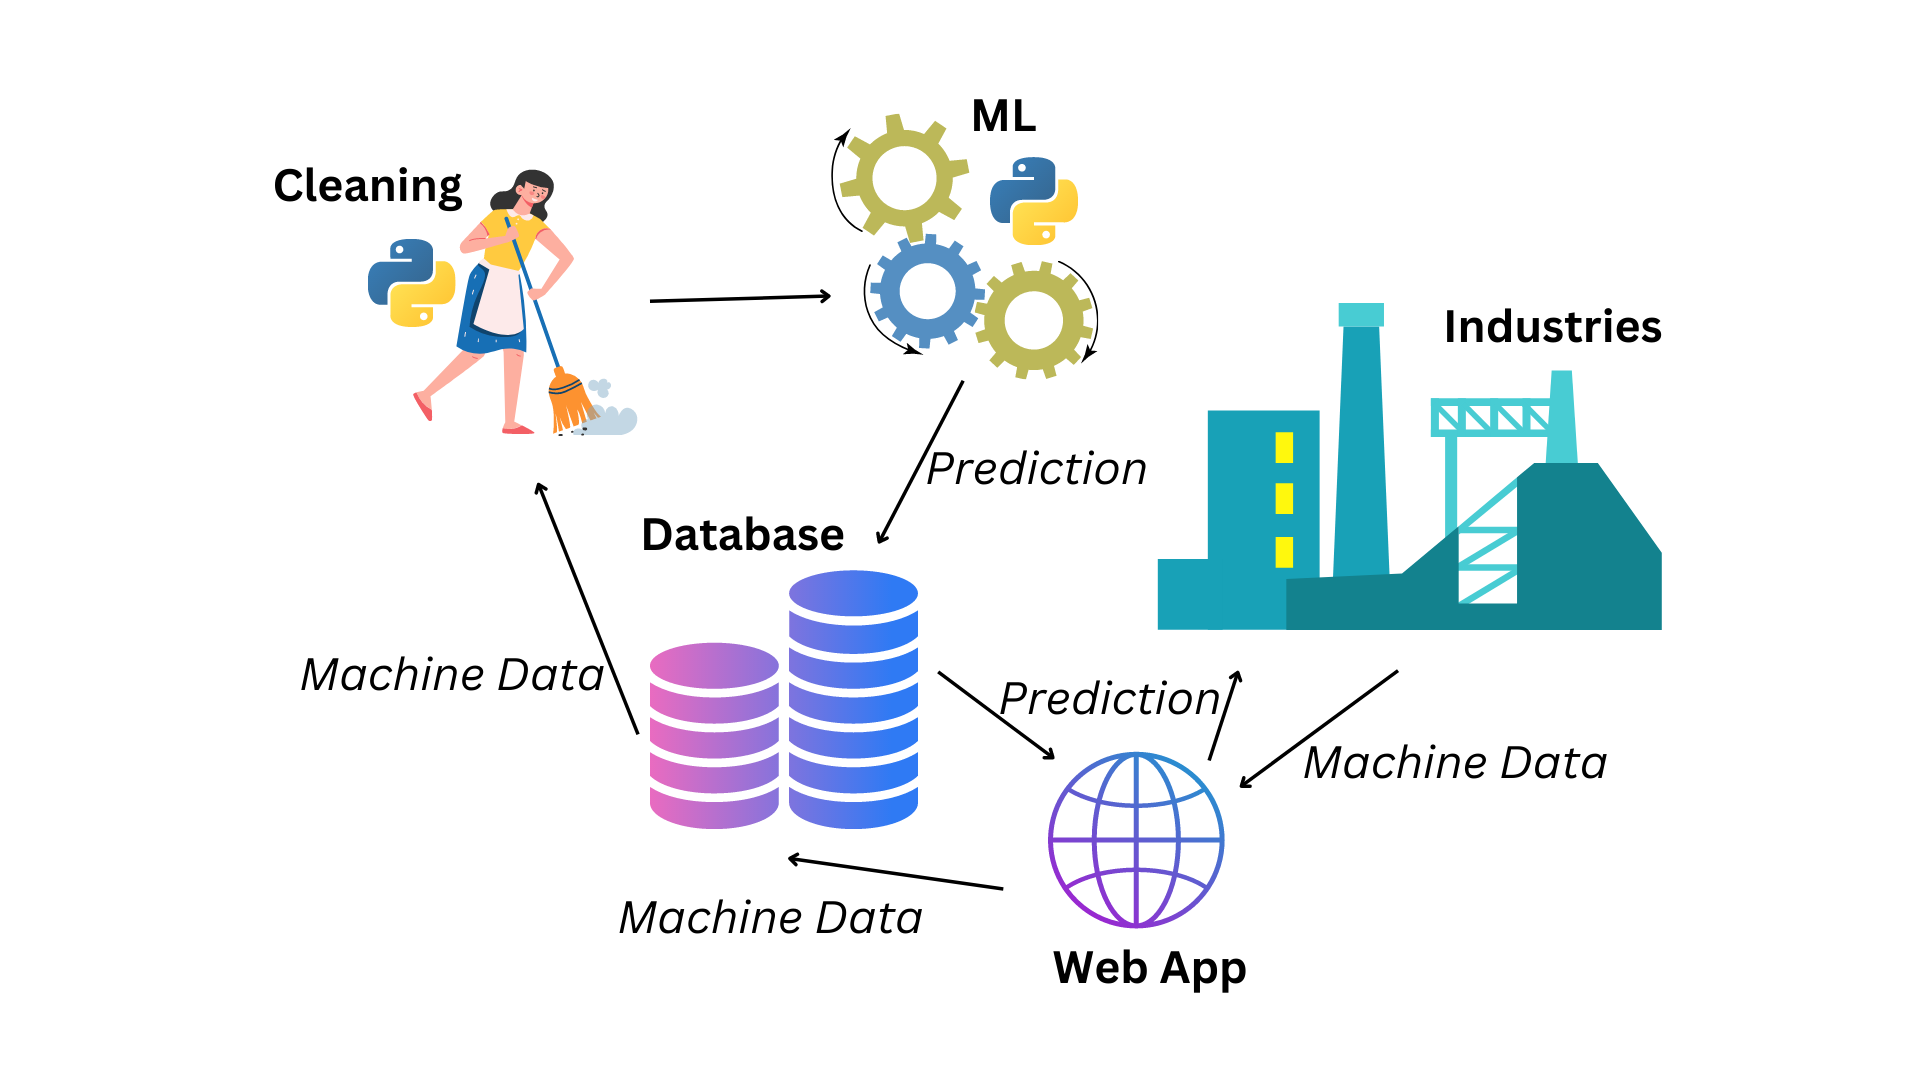